In [28]:
import tensorflow.keras as mod
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
#import library

In [29]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

In [30]:
from types import ModuleType
# Loading dataset
dataset = mod.datasets.mnist.load_data()

In [6]:
#loading testing and training datasets
#count of training dataset
print("There are",len(dataset[0][0]),"images in training dataset")
#count of testing dataset
print("There are",len(dataset[1][0]),"images in training dataset")


There are 60000 images in training dataset
There are 10000 images in training dataset


In [31]:
# Display total Shape of the Images testing and traing
print('The Shape of the Traning Dataset: {}'.format(dataset[0][0].shape))
print('The Shape of the Testing Dataset: {}'.format(dataset[1][0].shape))

The Shape of the Traning Dataset: (60000, 28, 28)
The Shape of the Testing Dataset: (10000, 28, 28)


In [32]:
#printing the labels of training dataset
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
#printing the labels of training dataset
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")


There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset


Randomly printing 10 images with labels from training dataset
index: 19049
Lable: 0


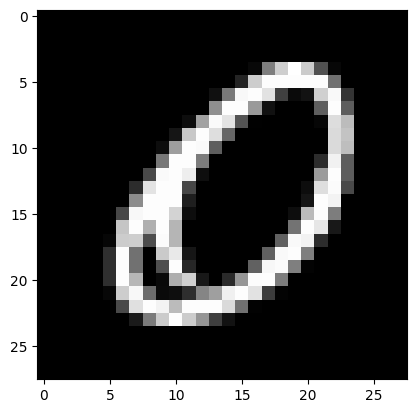

index: 11882
Lable: 5


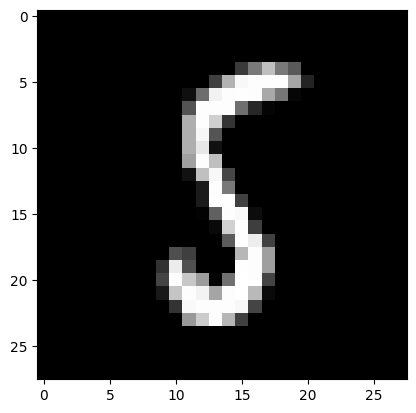

index: 54615
Lable: 3


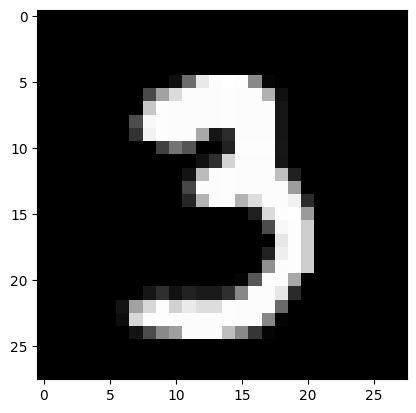

index: 3124
Lable: 3


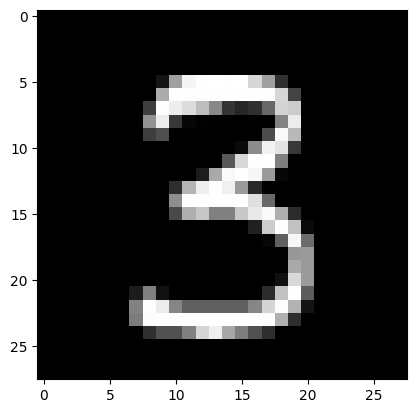

index: 23945
Lable: 9


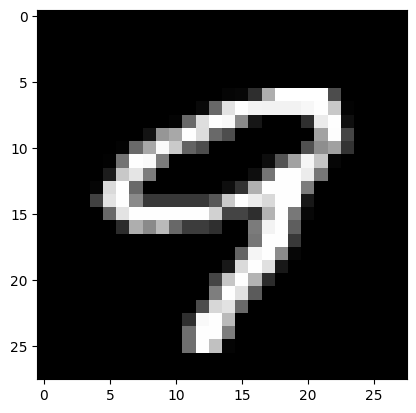

index: 53467
Lable: 1


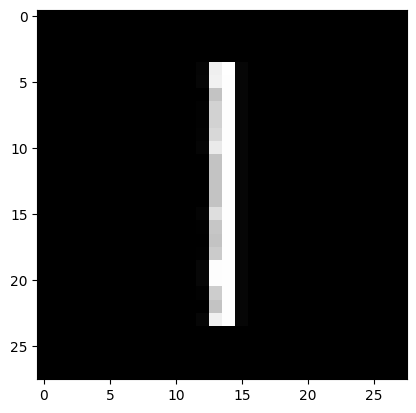

index: 31958
Lable: 2


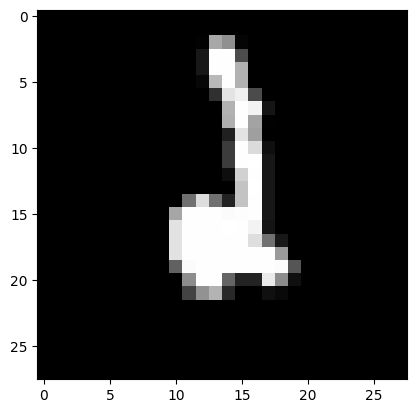

index: 15199
Lable: 7


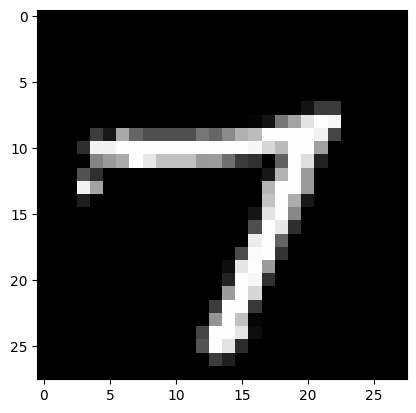

index: 3147
Lable: 2


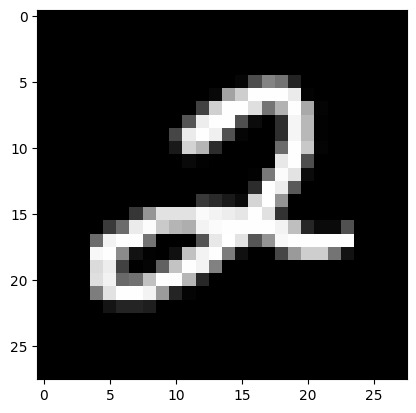

index: 29490
Lable: 0


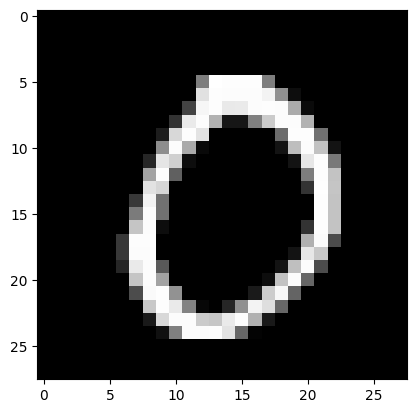

In [33]:
#Random 10 images with labels(training)
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])

Randomly printing 10 images with labels from testing dataset
index: 3659
Lable: 3


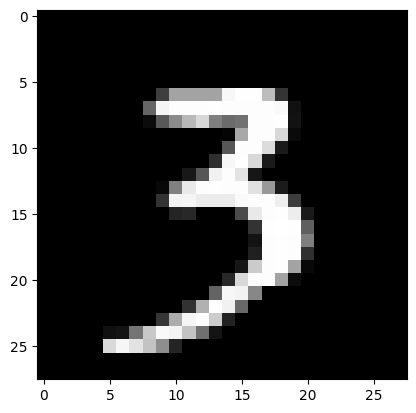

index: 827
Lable: 4


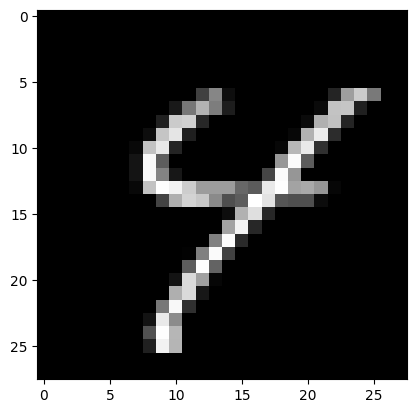

index: 7749
Lable: 2


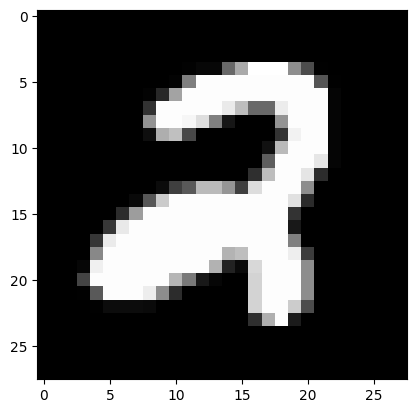

index: 4122
Lable: 9


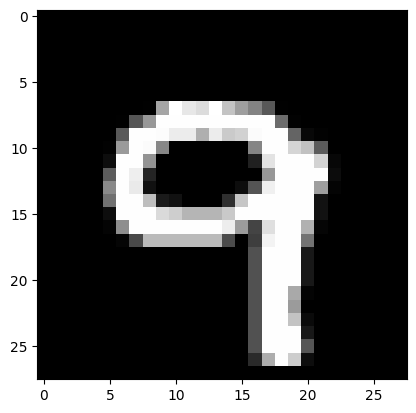

index: 4961
Lable: 2


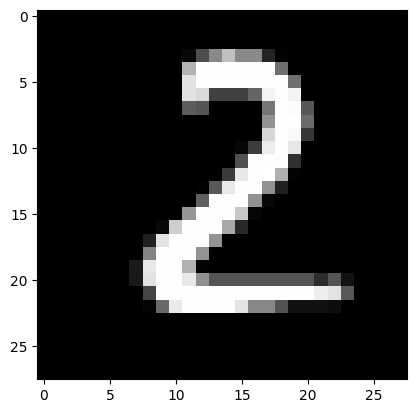

index: 2698
Lable: 5


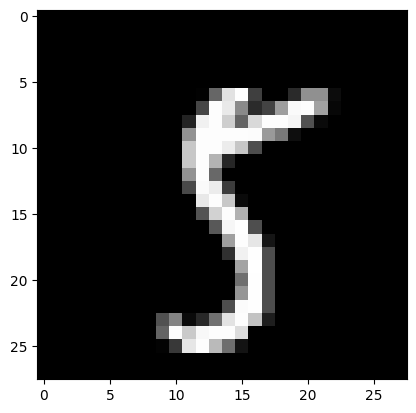

index: 7868
Lable: 0


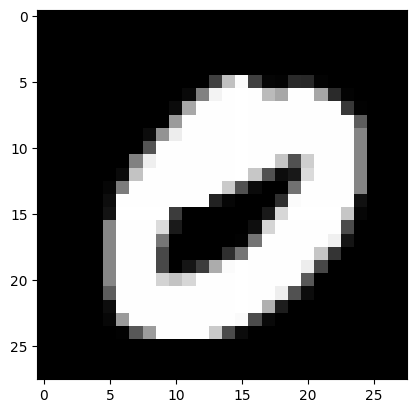

index: 1809
Lable: 7


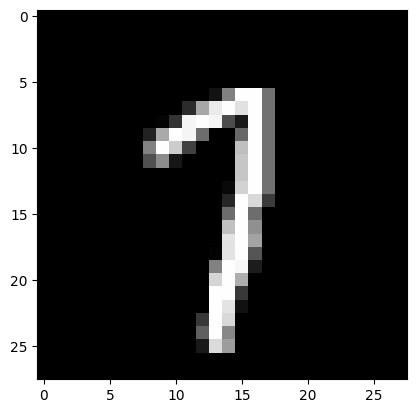

index: 8056
Lable: 0


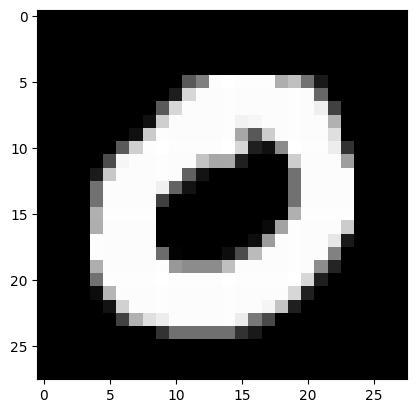

index: 5364
Lable: 5


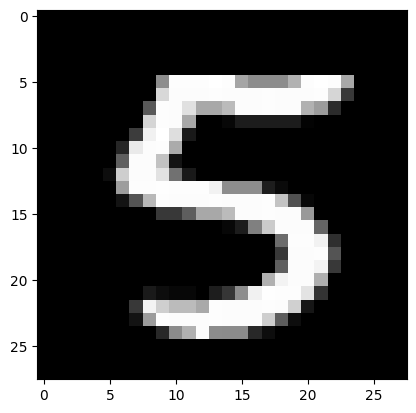

In [34]:
#Random 10 images with labels(testing)
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[1])

In [35]:
#10 unique classes in training dataset
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
#count of labels
display(collections.Counter(dataset[0][1]))




There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [36]:
#10 unique classes in validation dataset
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
#count of labels
display(collections.Counter(dataset[1][1]))

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

**Reduction of dataset to 10 times**

In [37]:
# Loading dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Function to reduce and balance the dataset
def reduce_and_balance_dataset(images, labels, num_images_per_label):
    reduced_images = []
    reduced_labels = []

    unique_labels = np.unique(labels)

    # Calculate the minimum number of images among all classes
    min_images_per_label = min([np.sum(labels == label) for label in unique_labels])

    for label in unique_labels:
        # Get indices of all images with the current label
        label_indices = np.where(labels == label)[0]

        # Randomly select the desired number of images for the current label
        selected_indices = np.random.choice(label_indices, min(min_images_per_label, num_images_per_label), replace=False)

        # Add the selected images and labels to the reduced dataset
        reduced_images.extend(images[selected_indices])
        reduced_labels.extend(labels[selected_indices])

    return np.array(reduced_images), np.array(reduced_labels)

# Desired number of images per label for training and testing datasets
num_images_per_label_train = 600
num_images_per_label_test = 100

# Reduce and balance the training and testing datasets
reduced_train_images, reduced_train_labels = reduce_and_balance_dataset(train_images, train_labels, num_images_per_label_train)
reduced_test_images, reduced_test_labels = reduce_and_balance_dataset(test_images, test_labels, num_images_per_label_test)

In [39]:
# reduced dataset is assigned in new_dataset
#It consists of two tuplesone for the reduced training data and labels and another for the reduced testing data and labels.
new_dataset = ((reduced_train_images, reduced_train_labels), (reduced_test_images, reduced_test_labels))

In [40]:
#finding the new dataset shape after reduction
print(new_dataset[0][0][0].shape)

(28, 28)


In [41]:
#checking training labels after reduction
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")


There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset


In [42]:
#unique classes in training  after reduction
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

In [43]:
#unique classes in validation after reduction
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[1][1]))

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

Randomly printing 10 images with labels from training dataset
index: 5195
Lable: 8


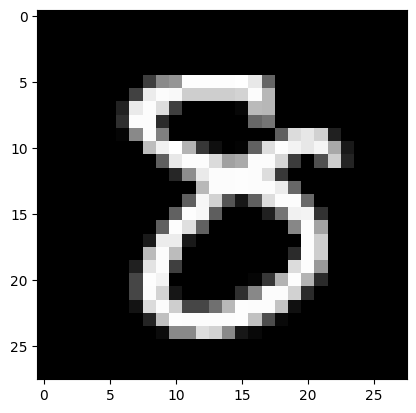

index: 5774
Lable: 9


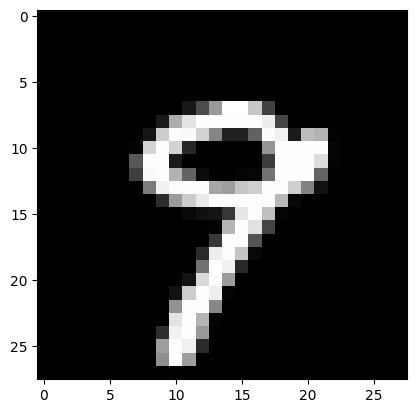

index: 687
Lable: 1


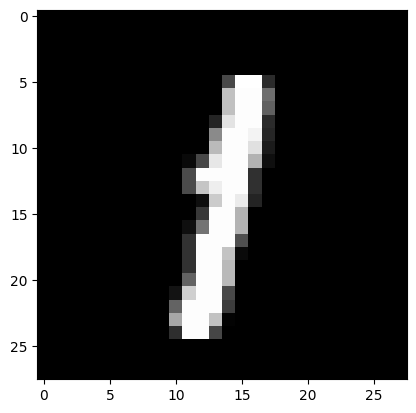

index: 4062
Lable: 6


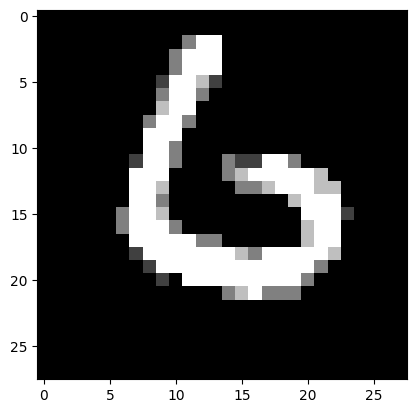

index: 5743
Lable: 9


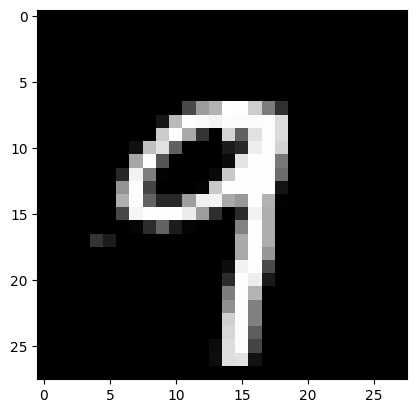

index: 3185
Lable: 5


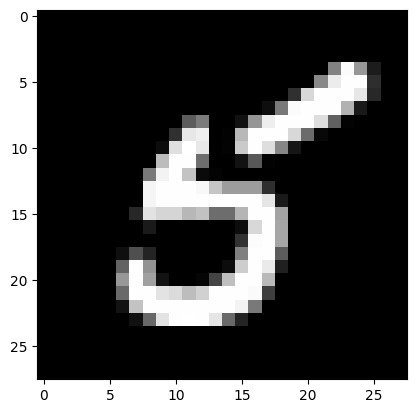

index: 5063
Lable: 8


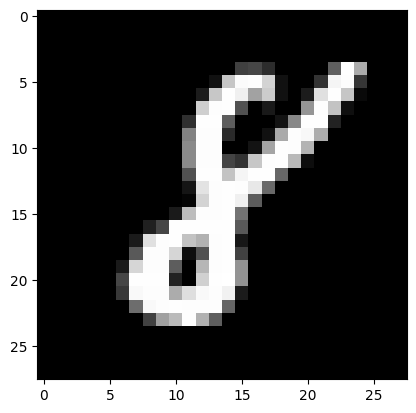

index: 1117
Lable: 1


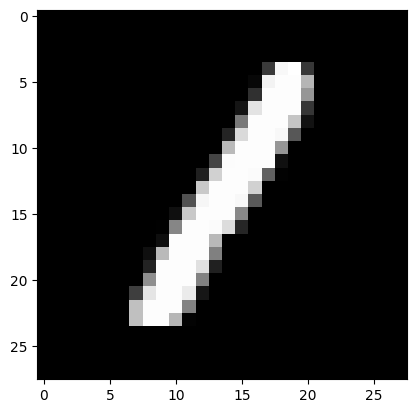

index: 2274
Lable: 3


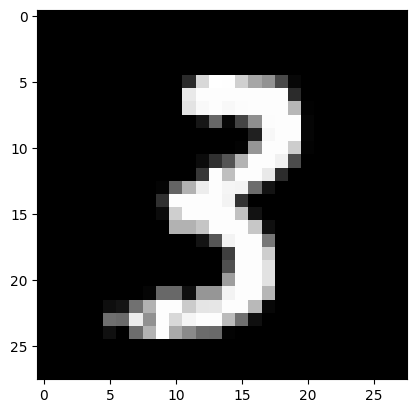

index: 4021
Lable: 6


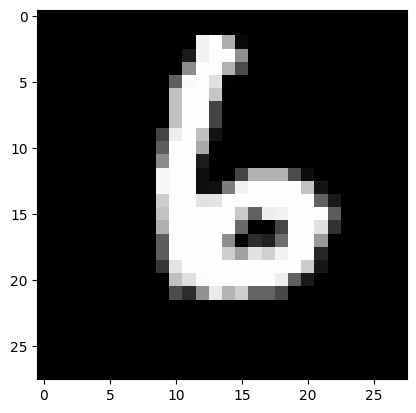

In [44]:
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])

Randomly printing 10 images with labels from testing dataset
index: 1750
Lable: 2


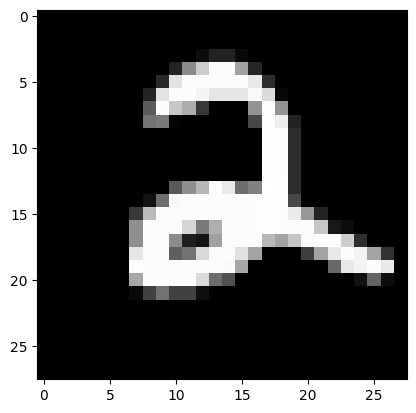

index: 4924
Lable: 8


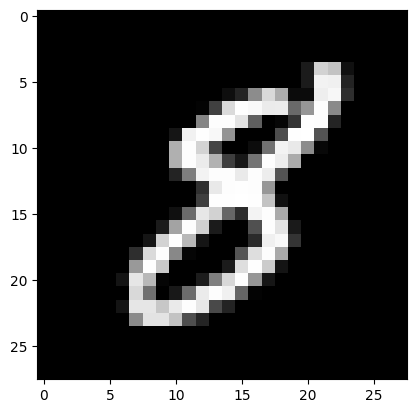

index: 559
Lable: 0


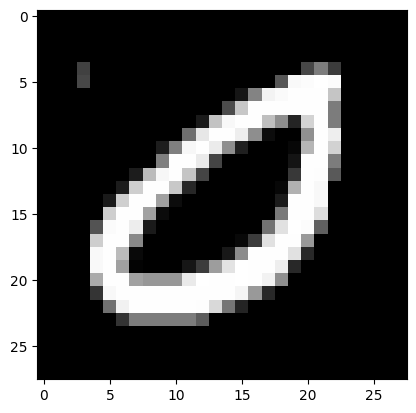

index: 2889
Lable: 4


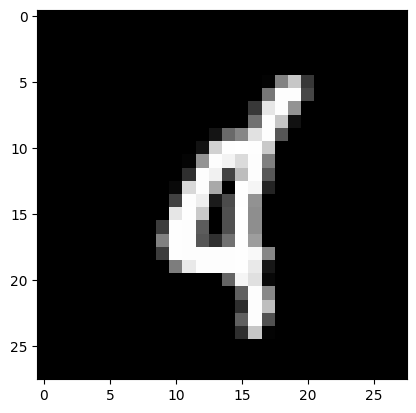

index: 2376
Lable: 3


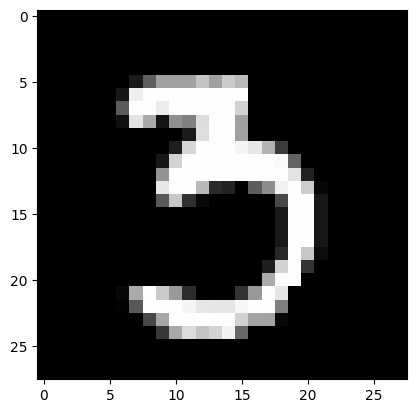

index: 3110
Lable: 5


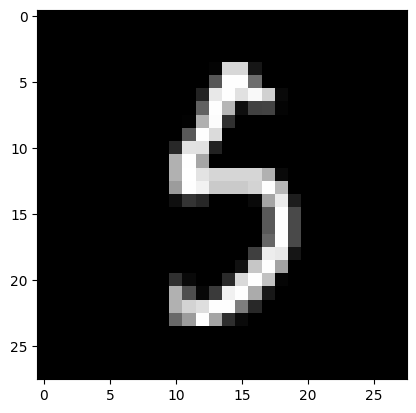

index: 2487
Lable: 4


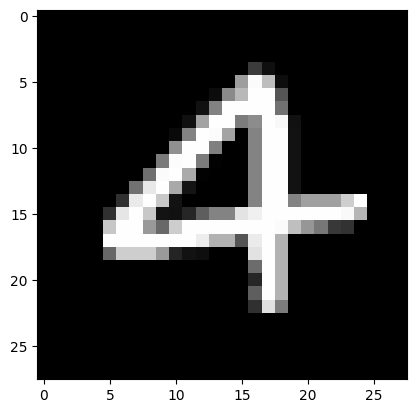

index: 3233
Lable: 5


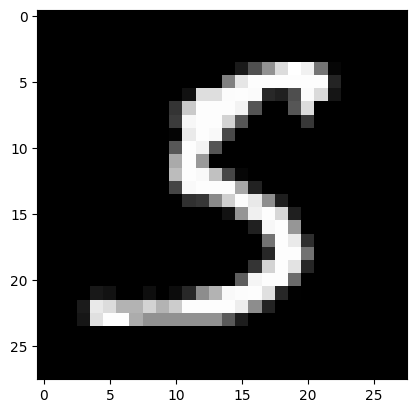

index: 4145
Lable: 6


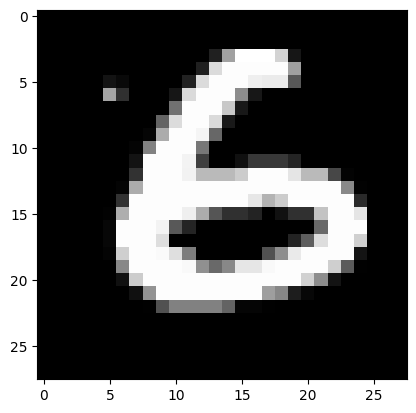

index: 3448
Lable: 5


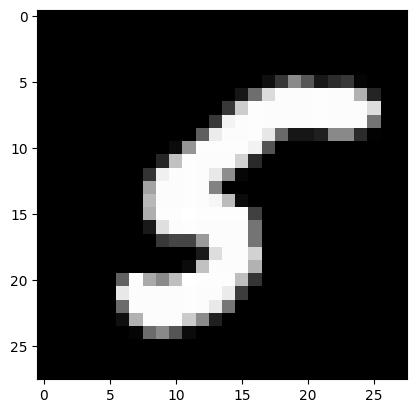

In [45]:
print("Randomly printing 10 images with labels from testing dataset")


display_random_images_with_labels(new_dataset[0])
